In [1]:
import pandas as pd

In [33]:
df = pd.read_csv("appointment.csv")
print(df.columns)


Index(['appointment_accepted', 'appointment_rejected', 'avg_request_per_day',
       'label'],
      dtype='object')


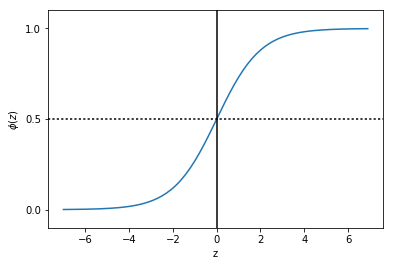

In [43]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


z = np.arange(-7.0,7.0,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0 , color = 'k')
plt.axhspan(0.0,1.0,facecolor = '1.0',alpha = 1.0,ls = 'dotted')
plt.axhline(y=0.5,ls ='dotted',color = 'k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()


In [3]:
df.head()

,appointment_accepted,appointment_rejected,avg_request_per_day,label
0,4,1,1,1
1,9,3,1,1
2,1,4,1,1
3,8,5,1,1
4,2,1,4,1


In [44]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx = None,resolution = 0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot decision Surfaces
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx1.min(),xx1.max())
    # plot all samples
    X_test,y_test = X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y=X[y==cl,1],alpha = 0.8,c = cmap(idx),marker = markers[idx],label = cl)
    #highlights test samples
    if test_idx:
        x_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c = '',alpha = 1.0,marker = 'o',linewidth = 1,s = 55,label = 'test set')


In [35]:
from sklearn.model_selection import train_test_split
y = df.label
X = df.drop('label',axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
X_combined_std =np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#plot_decision_regions(X_train_std,X_test_std,classifier = lr, test_idx = range(105,150))

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state  = 0)
lr.fit(X_train,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
lr.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [52]:
lr.score(X_test,y_test)

0.96739130434782605

In [65]:
m = int(input("accepted : "))
n = int(input("rejected : "))
o = int(input("request/day : "))

accepted : 4
rejected : 20
request/day : 20


In [67]:
print("res : ",lr.predict([m,n,o]))

res :  [0]


C:\Users\adity\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
